### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

### Research Question 

How accurately can salary be predicted based on the features in this dataset? What are the best predictors of salary? 

### Load and Explore Dataset

While this dataset originally came from an online survey at askamanager.org (https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html), it was cleaned in the "Data cleaning" file to create more encompassing categorical bins, and remove unnecessary and repetitive information and columns. 

In [2]:
df = pd.read_csv('Salary.csv')

In [3]:
df

,Salary (USD),Job title_Bin,Industry,Country,Race_Bin,Age,Gender_Bin,Highest level of education completed,Experience
0,55000.00000,Non-Managerial Employee,education,USA,White,25-34,Woman,Master's degree,5
1,77416.09668,Management,tech,UK,White,25-34,Other,College degree,8
2,34000.00000,Non-Managerial Employee,finance,USA,White,25-34,Woman,College degree,2
3,65000.00000,Management,nonprofit,USA,White,25-34,Woman,College degree,8
4,67000.00000,Management,finance,USA,White,25-34,Woman,College degree,8
...,...,...,...,...,...,...,...,...,...
26547,80000.00000,Non-Managerial Employee,manufacturing,USA,Mixed Race,25-34,Man,Master's degree,8
26548,159500.00000,Management,property,USA,Asian or Asian American,45-54,Woman,College degree,11
26549,73700.00000,Non-Managerial Employee,business,USA,White,25-34,Woman,Master's degree,11
26550,332000.00000,Non-Managerial Employee,finance,USA,White,25-34,Woman,"Professional degree (MD, JD, etc.)",11


In [4]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Cleaned Salary Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

In [5]:
df.dtypes

Salary (USD)                            float64
Job title_Bin                            object
Industry                                 object
Country                                  object
Race_Bin                                 object
Age                                      object
Gender_Bin                               object
Highest level of education completed     object
Experience                                int64
dtype: object

In [6]:
df.nunique()

Salary (USD)                            5378
Job title_Bin                              4
Industry                                  26
Country                                   53
Race_Bin                                   7
Age                                        7
Gender_Bin                                 3
Highest level of education completed       6
Experience                                 8
dtype: int64

In [7]:
df.isna().sum()

Salary (USD)                            0
Job title_Bin                           0
Industry                                0
Country                                 0
Race_Bin                                0
Age                                     0
Gender_Bin                              0
Highest level of education completed    0
Experience                              0
dtype: int64

In [8]:
len(df)

26552

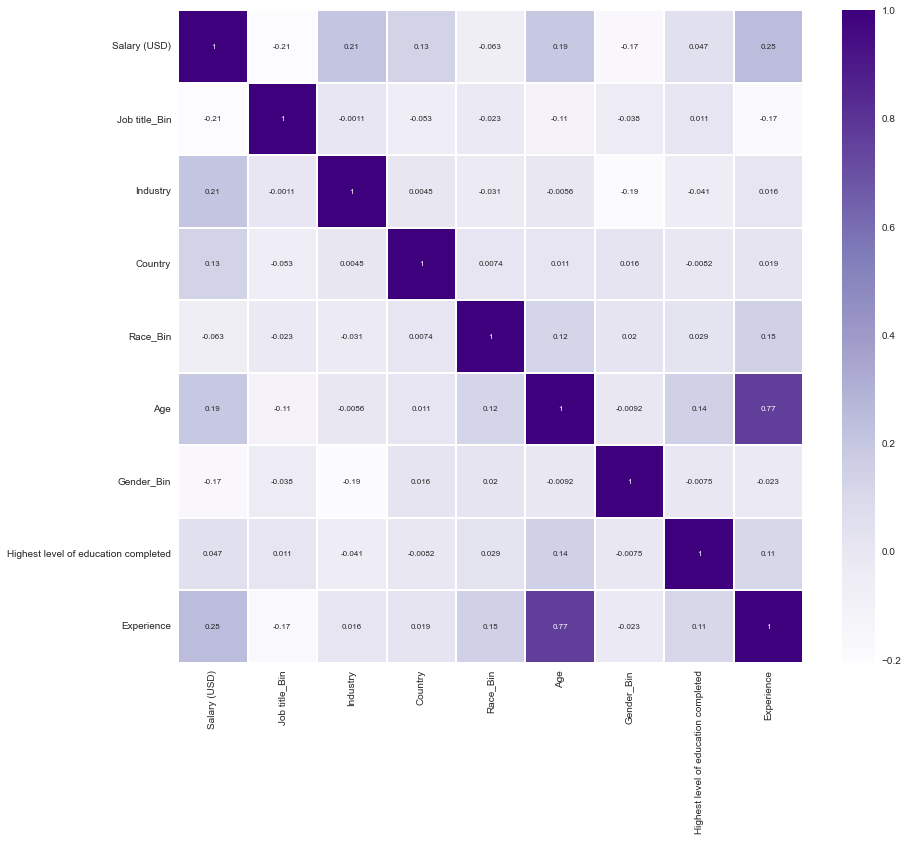

In [9]:
data = df.copy()

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);

The top 3 features most correlated to salary are 'Experience', 'Industry', and 'Age'. Below, the distribution of the salary mean within each of these features will be explored.

In [10]:
df[['Salary (USD)', 'Age']].groupby(['Age'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Age,Salary (USD)
4,55-64,112118.305525
3,45-54,110098.860203
2,35-44,108394.838391
5,65 or over,101260.218368
1,25-34,96097.433537
6,under 18,71352.673555
0,18-24,63173.321134


The mean salary for each age category are fairly similar. It is surprising to see under 18 makes more than 18-24 and it is surprising to see how much both of those categories make each year on average. It is important to note that this data comes from a voluntary survey meaning only people who wanted to report their salary. This could explain the higher than expected salary averages.

In [11]:
df[['Salary (USD)', 'Industry']].groupby(['Industry'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Industry,Salary (USD)
16,property,204781.680297
22,tech,143939.835345
24,"tech,science",130500.000000
6,environment,108770.698819
8,finance,105631.124927
5,entertainment,104966.040039
19,science,104323.359504
2,"business,manufacturing",102209.353058
14,manufacturing,102140.706257
12,healthcare,96969.625683


The average salaries by industry are mostly as expected with people in the service industry and focusing on family making the least amount of money on average. At the top is property, tech, and science. It is interesting, but logical to see how close entertainment is to the highest paid industry. With the current popularity of social media influencers, it makes sense that entertainment has high salaries and could also explain the high average salaries for under 18 year olds. 

In [12]:
df[['Salary (USD)', 'Experience']].groupby(['Experience'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Experience,Salary (USD)
5,21,116313.964011
3,8,112751.077943
6,31,112478.844742
4,11,107205.532817
7,41,103800.238224
2,5,83848.058359
1,2,72080.818737
0,0,68289.003595


It is quite surprising to see that an experience level of atleast 8 years was the group with the 2nd largest average salary. Any supposed error attributing to this result was supposed to be compensated by the reduction of both original experience columns into just one by taking the larger of the 2 (in case someone with high professional experience decided to change fields later in their career). However, it seems as though the salary seems to decline after more than 21 years of experience. It maybe assumed that the salary difference can be attributed to a 'generation gap' since people with 30+ years of experience in a field generally prefer to stay in the same role instead of advancing in their career to adapt to advancements in their respective field. Considering the means of data collection being an online survey on a blog, and the fact that one of the highest paying industries is tech (which experiences a high rate of change with innovations and advancements in various fields), these results are heavily favored toward groups with 21 or 8 years of experience. 

In [20]:
# Creates ordinal encoding for specific columns based on defined categories
data2 = df.drop(columns=['Salary (USD)'])
cols_to_encode = ['Industry', 'Country', 'Race_Bin','Gender_Bin', 'Job title_Bin']
ordinalencoder=OrdinalEncoder()
data2[cols_to_encode] = ordinalencoder.fit_transform(data2[cols_to_encode])
data2[cols_to_encode] = data2[cols_to_encode].astype('category')

data2.Age = data2.Age.map({'25-34':2,
                          'under 18':0,
                          '35-44':3,
                          '18-24':1,
                          '45-54':4,
                          '55-64':5,
                          '65 or over':6})
data2['Age'] = data2['Age'].astype('category')

data2['Highest level of education completed'] = data2['Highest level of education completed'].map({'College degree':2,
                          'High School':0,
                          "Master's degree":3,
                          'Some college':1,
                          'PhD':4,
                          'Professional degree (MD, JD, etc.)':4})
data2['Highest level of education completed'] = data2['Highest level of education completed'].astype('category')

data2


,Job title_Bin,Industry,Country,Race_Bin,Age,Gender_Bin,Highest level of education completed,Experience
0,3.0,3.0,51.0,6.0,2,2.0,3,5
1,2.0,22.0,50.0,6.0,2,1.0,2,8
2,3.0,8.0,51.0,6.0,2,2.0,2,2
3,2.0,15.0,51.0,6.0,2,2.0,2,8
4,2.0,8.0,51.0,6.0,2,2.0,2,8
...,...,...,...,...,...,...,...,...
26547,3.0,14.0,51.0,4.0,2,0.0,3,8
26548,2.0,16.0,51.0,0.0,4,2.0,2,11
26549,3.0,1.0,51.0,6.0,2,2.0,3,11
26550,3.0,8.0,51.0,6.0,2,2.0,4,11



MAE: 895.1251676573573
MSE: 1214081.0190337338
RMSE: 1101.8534471669695

training set MAE: 873.8398119605301
training set MSE: 1156536.8345462398
training set RMSE: 1075.4240254644862


/Users/ajoseph/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.11355046, 0.33201586, 0.13430272, 0.02224409, 0.02992267,
       0.04435837, 0.16573488, 0.15787095])

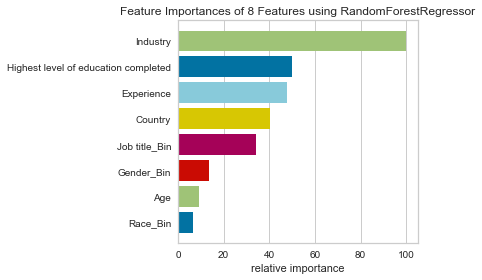

In [21]:
X = data2
y = data['Salary (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clr = RandomForestRegressor(n_estimators=30, max_depth=8,random_state=0)
clr.fit(X_train,y_train)
y_pred_forest = clr.predict(X_test)
y_trainpred_forest = clr.predict(X_train)


#MAE
MAE1 = metrics.mean_absolute_error(y_test,y_pred_forest)
print('\nMAE:',MAE1)
#MSE
MSE1 = metrics.mean_squared_error(y_test,y_pred_forest)
print('MSE:',MSE1)
#RMSE
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_forest))
print('RMSE:',RMSE1)


#MAE
MAE1 = metrics.mean_absolute_error(y_train,y_trainpred_forest)
print('\ntraining set MAE:',MAE1)
#MSE
MSE1 = metrics.mean_squared_error(y_train,y_trainpred_forest)
print('training set MSE:',MSE1)
#RMSE
RMSE1 = np.sqrt(metrics.mean_squared_error(y_train,y_trainpred_forest))
print('training set RMSE:',RMSE1)


FeatureImportances(clr).fit(X_train,y_train).finalize()

clr.feature_importances_

Graphing the feature importance, it can be observed that the industry of work appeared to be the most contributing factor to salary estimation, then education level, followed by experience. This is different from the observations of the heatmap which explored the correlatioin of the features against salary in the descending order: 'Experience', 'Industry', 'Age'.

/Users/ajoseph/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


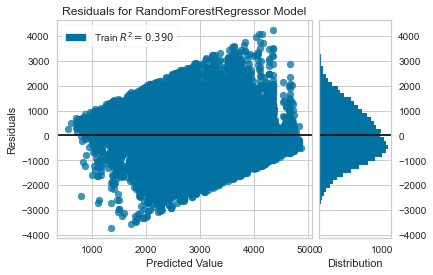

In [22]:
ResidualsPlot(clr, hist=True, qqplot=False).fit(X_train, y_train).finalize()

According to the residuals plot, there lacks a random, uniform distribution of residuals against the target and the R-squared value was interpretted to be approximately 0.39 which suggest that the random forest regression model does not accurately predict the salary. This was expected due to the environment from which this dataset was collected and the lack of means for validating the values. In addition, these dataset values were taken from individuals around the world with jobs in many different industries for which it is very difficult to standardize a model for determining salary. 

The best way to approach creating a model would be to categorize data entries into specific groups based a specific set of features and build multiple models to characterize subsets of the dataset. 